In [13]:
import math as m
import qiskit
#from qiskit import *
from qiskit import BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [48]:
#The first step is to encode the data into quantum states.
#There are some techniques to do it, in this case Amplitude embedding was used

A = [2,9]
B = [9,-2]

norm_A = 0 
norm_B = 0
Dist = 0
for i in range(len(A)):
    norm_A += A[i]**2
    norm_B += B[i]**2
    Dist += (A[i] - B[i])**2
    
Dist = m.sqrt(Dist)    
A_norm = m.sqrt(norm_A)
B_norm = m.sqrt(norm_B)
Z = round( A_norm ** 2 + B_norm ** 2)

# create phi and psi state with the data
phi = [A_norm/m.sqrt(Z), -B_norm/m.sqrt(Z)]
psi = []
for i in range(len(A)):
    psi.append(((A[i]/A_norm) / m.sqrt(2)))
    psi.append(((B[i]/B_norm) / m.sqrt(2)))

print(psi)
print(phi)

[0.15339299776947407, 0.6902684899626333, 0.6902684899626333, -0.15339299776947407]
[0.7071067811865475, -0.7071067811865475]



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


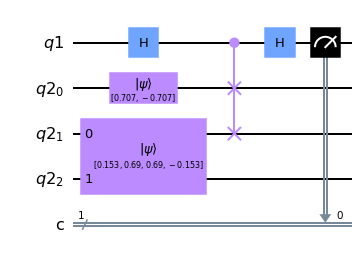

In [46]:
!pip  install pylatexenc
q1 = QuantumRegister(1, name = 'q1')
q2 = QuantumRegister(3, name = 'q2')
c = ClassicalRegister(1, name = 'c')
qc = QuantumCircuit(q1,q2,c)
#States initialization
qc.initialize(phi, q2[0])
print('Holi')
qc.initialize(psi, q2[1:3])

# The swap test operator
#qc.x(qreg[1])

#swap_test
qc.h(q1[0])
qc.cswap(q1[0], q2[0], q2[1])
qc.h(q1[0]) 
qc.measure(q1,c)

display(qc.draw(output="mpl"))

In [51]:
shots = 10000
job = execute(qc,BasicAer.get_backend('qasm_simulator'),shots=shots)
job_result = job.result()
counts = job_result.get_counts(qc)
x = abs(((counts['0']/shots)-1/2)*2 * 2 * Z)
Q_Dist = round(m.sqrt(x),4)
print('Distancia cuántica: ', round(Q_Dist,3))
print('Distancia Euclideana: ', Dist)

Distancia cuántica:  12.73
Distancia Euclideana:  13.038404810405298
